In [2]:
import os
import numpy as np
import pandas as pd
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re 


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_excel("comment_augmented.xlsx")

In [5]:
df3 = pd.read_excel('test_set.xlsx')

In [6]:
df3

,Comment,Date
0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-27 23:52:19
1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-27 19:53:53
2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-27 19:45:05
3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-27 19:45:39
4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-27 19:46:18
...,...,...
5104,"""الله إستر ها علاش مابغيناش الحدود إتحل.""",09/06/2021
5105,"""وسير نوض بوخروبة من القبور يديها يديكم فشي...",09/06/2021
5106,"""Maskin. Ba9i tayhlam min ahad bomadyansahr...",09/06/2021
5107,"""هههه الغباء والجهل الجزائري \nصح من قال عن...",09/06/2021


In [7]:
df4 = pd.concat([df3, df])

In [8]:
df4

,Comment,Date,Unnamed: 0,Username,Label,Catègorie
0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-27 23:52:19,NaN,NaN,NaN,NaN
1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-27 19:53:53,NaN,NaN,NaN,NaN
2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-27 19:45:05,NaN,NaN,NaN,NaN
3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-27 19:45:39,NaN,NaN,NaN,NaN
4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-27 19:46:18,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4129,اصمت لعلى صمتك راحة بالنسبة لهم,NaT,4129.0,NaN,-1.0,NaN
4130,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,NaT,4130.0,NaN,-1.0,NaN
4131,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,NaT,4131.0,NaN,-1.0,NaN
4132,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,NaT,4132.0,NaN,-1.0,NaN


In [9]:
#library that contains punctuation
import string
punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~,؟'
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in punctuation])
    return punctuationfree
#storing the puntuation free text
df4['clean_comment']= df4['Comment'].apply(lambda x:remove_punctuation(str(x)))
df4.head()

,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment
0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-27 23:52:19,NaN,NaN,NaN,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...
1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-27 19:53:53,NaN,NaN,NaN,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...
2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-27 19:45:05,NaN,NaN,NaN,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...
3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-27 19:45:39,NaN,NaN,NaN,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...
4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-27 19:46:18,NaN,NaN,NaN,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...


In [10]:
def remove_numbers(data):
    """Remove all digits from the input string."""
    result = ""
    for char in data:
        if not char.isdigit():
            result += char
    return result

In [11]:
df4['comment_num'] = df4['clean_comment'].apply(lambda x: remove_numbers(x))

In [12]:
#df['comment_num']= remove_numbers(df['clean_comment'])

In [13]:
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel

In [14]:
df4['comment_tokenized']= df4['comment_num'].apply(lambda x: tokenize(x, conditions=is_arabicrange, morphs=strip_tashkeel))

In [15]:
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('arabic')

In [18]:
import arabicstopwords.arabicstopwords as stp

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the Arabic stopwords if not already downloaded
nltk.download('stopwords')

# Load the Arabic stopwords from NLTK
arabic_stopwords = stopwords.words('arabic')
arabic_stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [20]:
stop_words2 = stp.stopwords_list()
stop_words2


['أن',
 'أنك',
 'أنكما',
 'أنكم',
 'أنكن',
 'أننا',
 'أنها',
 'أنه',
 'أنهما',
 'أنهم',
 'أنهن',
 'أني',
 'بأن',
 'بأنك',
 'بأنكما',
 'بأنكم',
 'بأنكن',
 'بأننا',
 'بأنها',
 'بأنه',
 'بأنهما',
 'بأنهم',
 'بأنهن',
 'بأني',
 'فأن',
 'فأنك',
 'فأنكما',
 'فأنكم',
 'فأنكن',
 'فأننا',
 'فأنها',
 'فأنه',
 'فأنهما',
 'فأنهم',
 'فأنهن',
 'فأني',
 'فبأن',
 'فبأنك',
 'فبأنكما',
 'فبأنكم',
 'فبأنكن',
 'فبأننا',
 'فبأنها',
 'فبأنه',
 'فبأنهما',
 'فبأنهم',
 'فبأنهن',
 'فبأني',
 'فكأن',
 'فكأنك',
 'فكأنكما',
 'فكأنكم',
 'فكأنكن',
 'فكأننا',
 'فكأنها',
 'فكأنه',
 'فكأنهما',
 'فكأنهم',
 'فكأنهن',
 'فكأني',
 'فلأن',
 'فلأنك',
 'فلأنكما',
 'فلأنكم',
 'فلأنكن',
 'فلأننا',
 'فلأنها',
 'فلأنه',
 'فلأنهما',
 'فلأنهم',
 'فلأنهن',
 'فلأني',
 'كأن',
 'كأنك',
 'كأنكما',
 'كأنكم',
 'كأنكن',
 'كأننا',
 'كأنها',
 'كأنه',
 'كأنهما',
 'كأنهم',
 'كأنهن',
 'كأني',
 'لأن',
 'لأنك',
 'لأنكما',
 'لأنكم',
 'لأنكن',
 'لأننا',
 'لأنها',
 'لأنه',
 'لأنهما',
 'لأنهم',
 'لأنهن',
 'لأني',
 'وأن',
 'وأنك',
 'وأنكما',
 'وأنكم',
 '

In [21]:
len(df4['comment_num'])

9243

In [22]:
def remove_stopwords2(text):
    output= [i for i in text if i not in stop_words2]
    return output
#applying the function
df4['no_stopwords']= df4['comment_tokenized'].apply(lambda x:remove_stopwords2(x))

In [23]:
#defining the function to remove stopwords from tokenized text

def remove_stopwords(text):
    output= [i for i in text if i not in arabic_stopwords]
    return output
#applying the function
df4['no_stopwords']= df4['comment_tokenized'].apply(lambda x:remove_stopwords(x))

In [24]:
df4['ready_comment'] = df4['comment_tokenized'].apply(lambda x: ' '.join(x))

In [25]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# Preprocess the text data by removing stopwords and lemmatizing the words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import nltk


def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()

    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [27]:
df4['ready_comment'] = df4['ready_comment'].apply(preprocess_text)
df4

,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment
0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-27 23:52:19,NaN,NaN,NaN,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, عينهم, الشعب, الأصل, ن...",زعما هاد الناس واش عينهم في الشعب لي هو في الأ...
1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-27 19:53:53,NaN,NaN,NaN,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, الماء...",بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...
2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-27 19:45:05,NaN,NaN,NaN,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...
3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-27 19:45:39,NaN,NaN,NaN,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...
4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-27 19:46:18,NaN,NaN,NaN,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...",وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...
...,...,...,...,...,...,...,...,...,...,...,...
4129,اصمت لعلى صمتك راحة بالنسبة لهم,NaT,4129.0,NaN,-1.0,NaN,اصمت لعلى صمتك راحة بالنسبة لهم,اصمت لعلى صمتك راحة بالنسبة لهم,"[اصمت, لعلى, صمتك, راحة, بالنسبة, لهم]","[اصمت, لعلى, صمتك, راحة, بالنسبة]",اصمت لعلى صمتك راحة بالنسبة لهم
4130,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,NaT,4130.0,NaN,-1.0,NaN,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,"[حديقة, حيوانات, ولازال, هنالك, اناس, لا, يؤمن...","[حديقة, حيوانات, ولازال, اناس, يؤمنون, بنظرية,...",حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...
4131,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,NaT,4131.0,NaN,-1.0,NaN,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,"[أفعى, بجدارة, تريثت, تربصت, وكان, الفحيح, متع...","[أفعى, بجدارة, تريثت, تربصت, وكان, الفحيح, متع...",أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...
4132,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,NaT,4132.0,NaN,-1.0,NaN,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,"[لا, يقطع, الرأس, غير, الي, ركبه, الان, اصبح, ...","[يقطع, الرأس, الي, ركبه, الان, اصبح, تركيب, ال...",لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...


In [28]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
df4['Label'].unique()

array([nan, -1.,  0.,  1.])

In [31]:
df4['Label'].shape

(9243,)

In [32]:
df4.reset_index(inplace=True)

In [57]:
# perform TF-IDF analysis
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df4['ready_comment'])

In [58]:
from scipy.sparse import csr_matrix

tfidf_sparse = csr_matrix(tfidf)

# Further processing with the sparse matrix...


In [61]:
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf, columns=vectorizer.get_feature_names_out())



In [62]:
tfidf_df.shape

(9243, 32220)

In [63]:
df4.iloc[0]['Comment']

'زعما هاد الناس واش عينهم في الشعب لي هو في الأصل نهار أومطال طفي ضو نقص لماء باش لفاتورة متكونش غالية  أو بلا كثرة لهضرة راه كاينة فئة كتستهلك الماء والكهرباء أضعاف  مضاعفة😢😢😢'

In [64]:

tfidf_df

,ءادم,ءاله,ءامنوا,ءايما,آآآه,آبار,آبارنا,آبى,آبۆآب,آثار,...,ﻭﺗﻘﺒﻴﻞ,ﻭﺭﻋﺎﻙ,ﻭﻛﻞ,ﻳﺎ,ﻳﺪﻩ,ﻳﻮﻡ,ﻷمثاله,ﻷن,ﻹرتفاع,ﻻنهم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
tfidf_df.iloc[0]

TypeError: SparseArray does not support item assignment via setitem

In [ ]:
# extract the TF-IDF scores
'''
feature_names = vectorizer.get_feature_names()

tfidf_scores = []
for i in range(len(df['ready_comment'])):

    feature_index = tfidf[i, :].nonzero()[1]
    tfidf_scores.append(dict(zip([feature_names[j] for j in feature_index], [tfidf[i, j] for j in feature_index])))
'''

In [66]:
tfidf_df['label'] = df4['Label']

In [67]:
tfidf_df['label'].unique()

array([nan, -1.,  0.,  1.])

In [68]:
tfidf_df_labeled = tfidf_df[-np.isnan(tfidf_df['label'])]

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
df_training, df_validation = train_test_split(tfidf_df_labeled, test_size=0.2, random_state=42)

In [70]:
df_training

,ءادم,ءاله,ءامنوا,ءايما,آآآه,آبار,آبارنا,آبى,آبۆآب,آثار,...,ﻭﺭﻋﺎﻙ,ﻭﻛﻞ,ﻳﺎ,ﻳﺪﻩ,ﻳﻮﻡ,ﻷمثاله,ﻷن,ﻹرتفاع,ﻻنهم,label
7795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
9129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
9010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
5575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [71]:
y_train = df_training['label']

In [72]:
X_train = df_training.drop(columns=['label'])

In [73]:
X_val, y_val = df_validation.drop(columns=['label']), df_validation['label']

In [74]:
y_val.shape

(826,)

In [75]:
#df = df[df['Label'] != 0]

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define different classification ML models to test
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3, metric='cosine')),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Loop over the models and train and evaluate each one
for model_name, model in models:
    pipe = Pipeline([
        ('clf', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    y_pred = pipe.predict(X_val)
    acc2 = accuracy_score(y_val, y_pred)
    #scores = cross_val_score(pipe, X_train, y_train, cv=10)
    #acc2 = scores.mean()
    print(f"{model_name} train accuracy: {acc:.2f} validation accuracy: {acc2:.2f}")
    

Logistic Regression train accuracy: 0.87 validation accuracy: 0.67
Multinomial Naive Bayes train accuracy: 0.79 validation accuracy: 0.66
K-Nearest Neighbors train accuracy: 0.78 validation accuracy: 0.60
Decision Tree train accuracy: 0.97 validation accuracy: 0.58
Random Forest train accuracy: 0.97 validation accuracy: 0.65


In [77]:
best_model = LogisticRegression()

In [78]:
best_model.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred = best_model.predict(X_train)

In [80]:
acc = accuracy_score(y_train, y_pred)

In [81]:
print(acc)

0.8691305664950015


In [82]:
y_pred = best_model.predict(X_val)
acc2 = accuracy_score(y_val, y_pred)
print(acc2)

0.6731234866828087


In [83]:
tfidf_df_test = tfidf_df[np.isnan(tfidf_df['label'])]

In [84]:
tfidf_df_test.drop(columns='label', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\1197705609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_df_test.drop(columns='label', inplace=True)


In [85]:
y_pred_test = best_model.predict(tfidf_df_test)

In [86]:
set(list(y_pred_test))

{-1.0, 0.0, 1.0}

In [87]:
df4.loc[np.isnan(tfidf_df['label']), 'Label'] = y_pred_test

In [88]:
import matplotlib.pyplot as plt

In [89]:
df4

,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment
0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-27 23:52:19,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, عينهم, الشعب, الأصل, ن...",زعما هاد الناس واش عينهم في الشعب لي هو في الأ...
1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-27 19:53:53,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, الماء...",بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...
2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-27 19:45:05,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...
3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-27 19:45:39,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...
4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-27 19:46:18,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...",وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...
...,...,...,...,...,...,...,...,...,...,...,...,...
9238,4129,اصمت لعلى صمتك راحة بالنسبة لهم,NaT,4129.0,NaN,-1.0,NaN,اصمت لعلى صمتك راحة بالنسبة لهم,اصمت لعلى صمتك راحة بالنسبة لهم,"[اصمت, لعلى, صمتك, راحة, بالنسبة, لهم]","[اصمت, لعلى, صمتك, راحة, بالنسبة]",اصمت لعلى صمتك راحة بالنسبة لهم
9239,4130,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,NaT,4130.0,NaN,-1.0,NaN,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,"[حديقة, حيوانات, ولازال, هنالك, اناس, لا, يؤمن...","[حديقة, حيوانات, ولازال, اناس, يؤمنون, بنظرية,...",حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...
9240,4131,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,NaT,4131.0,NaN,-1.0,NaN,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,"[أفعى, بجدارة, تريثت, تربصت, وكان, الفحيح, متع...","[أفعى, بجدارة, تريثت, تربصت, وكان, الفحيح, متع...",أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...
9241,4132,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,NaT,4132.0,NaN,-1.0,NaN,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,"[لا, يقطع, الرأس, غير, الي, ركبه, الان, اصبح, ...","[يقطع, الرأس, الي, ركبه, الان, اصبح, تركيب, ال...",لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...


In [93]:
df4['Date'] = pd.to_datetime(df4['Date'])
df_final = df4[-np.isnan(df4['Date'])]  
df_final['Date'] = df_final['Date'].dt.to_period('M').dt.to_timestamp()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\1306881866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Date'] = df_final['Date'].dt.to_period('M').dt.to_timestamp()


In [96]:
pos_df = df_final[df_final['Label'] == 1]
neg_df = df_final[df_final['Label'] == -1]
neut_df = df_final[df_final['Label'] == 0]

In [97]:
pos_df_date_grouped = pos_df.groupby('Date').count()['Comment']
neg_df_date_grouped = neg_df.groupby('Date').count()['Comment']
neut_df_date_grouped = neut_df.groupby('Date').count()['Comment']

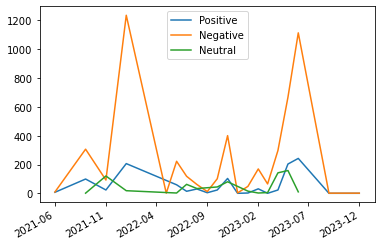

In [98]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

ax.plot(pos_df_date_grouped.index, pos_df_date_grouped.values, label='Positive')
ax.plot(neg_df_date_grouped.index, neg_df_date_grouped.values, label='Negative')
ax.plot(neut_df_date_grouped.index, neut_df_date_grouped.values, label='Neutral')

# Set the locator
locator = mdates.MonthLocator(interval=5)  # every month
ax.xaxis.set_major_locator(locator)

# Set the formatter
formatter = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(formatter)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.legend(loc='best')

plt.savefig('sentiments_over_time.png', dpi=300)
plt.show()

In [99]:
bar_df = df_final.groupby('Label').count()['Comment']

In [100]:
bar_df

Label
-1.0    4940
 0.0     706
 1.0    1088
Name: Comment, dtype: int64

In [101]:
bar_df = bar_df/bar_df.sum()

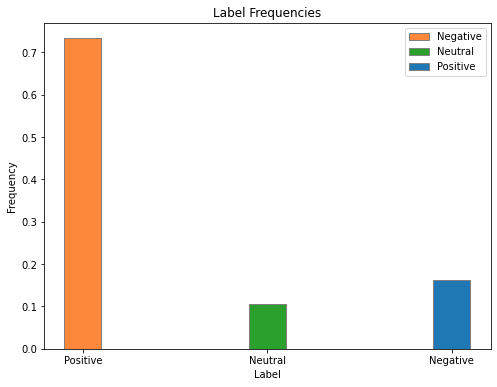

In [102]:
# Brighter color options
colors = {1: '#1f77b4', 0: '#2ca02c', -1: '#fd873a'}  # blue, green, red
labels = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}

plt.figure(figsize=(8,6))

# plot each value separately so we can control its color and label
for idx in bar_df.index:
    plt.bar(idx, bar_df.loc[idx], color=colors[idx], label=labels[idx], width=0.2, edgecolor='grey')

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequencies')
plt.legend()
plt.xticks(list(bar_df.index), labels.values())
plt.show()

<BarContainer object of 3 artists>

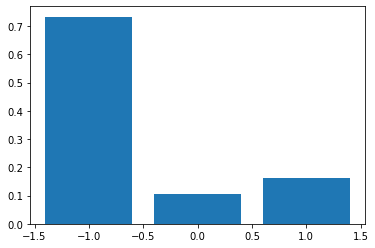

In [103]:
plt.bar(bar_df.index, bar_df.values)

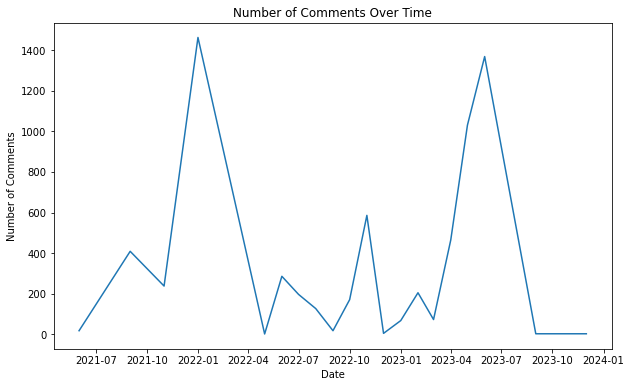

In [104]:
# Count comments per date
comment_counts = df_final.groupby('Date').count()

# Plot the comment counts
plt.figure(figsize=(10,6))
plt.plot(comment_counts.index, comment_counts['Comment'])
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments Over Time')
plt.savefig('comments_over_time.png', dpi=300)
plt.show()


In [105]:
df_final

,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment
0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, عينهم, الشعب, الأصل, ن...",زعما هاد الناس واش عينهم في الشعب لي هو في الأ...
1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, الماء...",بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...
2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...
3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...
4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...",وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...
...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, في, ...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...
6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"[لهاذا, أوقفو, زراعة, الأفوكادو]","[لهاذا, أوقفو, زراعة, الأفوكادو]",لهاذا أوقفو زراعة الأفوكادو
6736,1627,الحل هو منع زرع الافوكا,2022-10-01,1627.0,azizabernaoui,0.0,innovator,الحل هو منع زرع الافوكا,الحل هو منع زرع الافوكا,"[الحل, هو, منع, زرع, الافوكا]","[الحل, منع, زرع, الافوكا]",الحل هو منع زرع الافوكا
6737,1628,عوض! ما يدرو السرعة فالخوا الخاوي يديرو السرعة...,2022-10-01,1628.0,h19_ch,0.0,innovator,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,"[عوض, ما, يدرو, السرعة, فالخوا, الخاوي, يديرو,...","[يدرو, السرعة, فالخوا, الخاوي, يديرو, السرعة, ...",عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...


In [106]:
df_final.to_csv('df_fnl.csv', index=False)

In [107]:
df_kmens= pd.read_csv("df_fnl.csv")

In [108]:
df_kmens


,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment
0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"['زعما', 'هاد', 'الناس', 'واش', 'عينهم', 'في',...","['زعما', 'هاد', 'الناس', 'واش', 'عينهم', 'الشع...",زعما هاد الناس واش عينهم في الشعب لي هو في الأ...
1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"['بنادم', 'كيبغي', 'يتوضى', 'كيتوضى', 'بجوج', ...","['بنادم', 'كيبغي', 'يتوضى', 'كيتوضى', 'بجوج', ...",بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...
2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"['الترشید', 'یکون', 'للفلاحین', 'الذین', 'یستغ...","['الترشید', 'یکون', 'للفلاحین', 'الذین', 'یستغ...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...
3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"['خويو', 'لابيسيناتكم', 'ونقصو', 'من', 'المشيا...","['خويو', 'لابيسيناتكم', 'ونقصو', 'المشيان', 'ل...",خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...
4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"['وديك', 'الفيلات', 'والفيرمات', 'الي', 'كاين'...","['وديك', 'الفيلات', 'والفيرمات', 'الي', 'كاين'...",وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...
...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"['شتا', 'صبات', 'اشفرا', 'مسخيط', 'الولدين', '...","['شتا', 'صبات', 'اشفرا', 'مسخيط', 'الولدين', '...",شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...
6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"['لهاذا', 'أوقفو', 'زراعة', 'الأفوكادو']","['لهاذا', 'أوقفو', 'زراعة', 'الأفوكادو']",لهاذا أوقفو زراعة الأفوكادو
6736,1627,الحل هو منع زرع الافوكا,2022-10-01,1627.0,azizabernaoui,0.0,innovator,الحل هو منع زرع الافوكا,الحل هو منع زرع الافوكا,"['الحل', 'هو', 'منع', 'زرع', 'الافوكا']","['الحل', 'منع', 'زرع', 'الافوكا']",الحل هو منع زرع الافوكا
6737,1628,عوض! ما يدرو السرعة فالخوا الخاوي يديرو السرعة...,2022-10-01,1628.0,h19_ch,0.0,innovator,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,"['عوض', 'ما', 'يدرو', 'السرعة', 'فالخوا', 'الخ...","['يدرو', 'السرعة', 'فالخوا', 'الخاوي', 'يديرو'...",عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...


In [109]:
# If 'level_0' exists in df_final columns, drop it
if 'level_0' in df_kmens.columns:
    df_kmens = df_kmens.drop(columns=['level_0'])

# Reset the index
df_kmens.reset_index(inplace=True)


In [110]:
df_kmens


,level_0,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment
0,0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"['زعما', 'هاد', 'الناس', 'واش', 'عينهم', 'في',...","['زعما', 'هاد', 'الناس', 'واش', 'عينهم', 'الشع...",زعما هاد الناس واش عينهم في الشعب لي هو في الأ...
1,1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"['بنادم', 'كيبغي', 'يتوضى', 'كيتوضى', 'بجوج', ...","['بنادم', 'كيبغي', 'يتوضى', 'كيتوضى', 'بجوج', ...",بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...
2,2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"['الترشید', 'یکون', 'للفلاحین', 'الذین', 'یستغ...","['الترشید', 'یکون', 'للفلاحین', 'الذین', 'یستغ...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...
3,3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"['خويو', 'لابيسيناتكم', 'ونقصو', 'من', 'المشيا...","['خويو', 'لابيسيناتكم', 'ونقصو', 'المشيان', 'ل...",خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...
4,4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"['وديك', 'الفيلات', 'والفيرمات', 'الي', 'كاين'...","['وديك', 'الفيلات', 'والفيرمات', 'الي', 'كاين'...",وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"['شتا', 'صبات', 'اشفرا', 'مسخيط', 'الولدين', '...","['شتا', 'صبات', 'اشفرا', 'مسخيط', 'الولدين', '...",شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...
6735,6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"['لهاذا', 'أوقفو', 'زراعة', 'الأفوكادو']","['لهاذا', 'أوقفو', 'زراعة', 'الأفوكادو']",لهاذا أوقفو زراعة الأفوكادو
6736,6736,1627,الحل هو منع زرع الافوكا,2022-10-01,1627.0,azizabernaoui,0.0,innovator,الحل هو منع زرع الافوكا,الحل هو منع زرع الافوكا,"['الحل', 'هو', 'منع', 'زرع', 'الافوكا']","['الحل', 'منع', 'زرع', 'الافوكا']",الحل هو منع زرع الافوكا
6737,6737,1628,عوض! ما يدرو السرعة فالخوا الخاوي يديرو السرعة...,2022-10-01,1628.0,h19_ch,0.0,innovator,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,"['عوض', 'ما', 'يدرو', 'السرعة', 'فالخوا', 'الخ...","['يدرو', 'السرعة', 'فالخوا', 'الخاوي', 'يديرو'...",عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...


In [111]:
unwanted = [
    'حتي',
"،",
"ـ",
"ء",
"ءَ",
"آ",
"أ",
"ا",
"ا?",
"االا",
"االتى",
"آب",
"أبٌ",
"ابتدأ",
"أبدا",
"أبريل",
"أبو",
"ابين",
"اتخذ",
"اثر",
"اثنا",
"اثنان",
"اثني",
"اثنين",
"أجل",
"اجل",
"أجمع",
"أحد",
"احد",
"إحدى",
"أخٌ",
"أخبر",
"أخذ",
"آخر",
"اخرى",
"اخلولق",
"أخو",
"إذ",
"إذا",
"إذاً",
"اذا",
"آذار",
"إذما",
"إذن",
"أربع",
"أربعاء",
"أربعة",
"اربعة",
"أربعمائة",
"أربعمئة",
"اربعون",
"اربعين",
"ارتدّ",
"أرى",
"إزاء",
"استحال",
"أسكن",
"أصبح",
"اصبح",
"أصلا",
"آض",
"إضافي",
"أضحى",
"اضحى",
"اطار",
"أطعم",
"اعادة",
"أعطى",
"أعلم",
"اعلنت",
"أغسطس",
"أُفٍّ",
"أفٍّ",
"اف",
"أفريل",
"أفعل به",
"أقبل",
"أكتوبر",
"أكثر",
"اكثر",
"اكد",
"آل",
"أل",
"ألا",
"إلا",
"إلّا",
"الا",
"الاخيرة",
"الألاء",
"الألى",
"الآن",
"الان",
"الاول",
"الاولى",
"التي",
"التى",
"الثاني",
"الثانية",
"الحالي",
"الذاتي",
"الذي",
"الذى",
"الذين",
"السابق",
"ألف",
"الف",
"ألفى",
"اللاتي",
"اللتان",
"اللتيا",
"اللتين",
"اللذان",
"اللذين",
"اللواتي",
"الماضي",
"المقبل",
"الوقت",
"إلي",
"إلى",
"الي",
"الى",
"إلَيْكَ",
"إليكَ",
"إليكم",
"إليكما",
"إليكنّ",
"اليه",
"اليها",
"اليوم",
"أم",
"في",
"من",
"ان",
"او",
"الا"
]

In [112]:
df_kmens['no_stopwords']= df_kmens['comment_tokenized'].apply(lambda x:remove_stopwords2(x))

In [114]:
#storing the puntuation free text
df_kmens['clean_comment']= df_kmens['Comment'].apply(lambda x:remove_punctuation(str(x)))
df_kmens.head()

#removing numbers
df_kmens['comment_num'] = df_kmens['clean_comment'].apply(lambda x: remove_numbers(x))

def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

df_kmens['normalized_comment'] = df_kmens['comment_num'].apply(lambda x: normalize_arabic(x))

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

df_kmens['diacritics_comment'] = df_kmens['normalized_comment'].apply(lambda x: remove_diacritics(x))
#tokenization
df_kmens['comment_tokenized']= df_kmens['diacritics_comment'].apply(lambda x: tokenize(x, conditions=is_arabicrange, morphs=strip_tashkeel))
def remove_stopwords2(text):
    output= [i for i in text if i not in stop_words2]
    return output
#applying the function
df_kmens['no_stopwords']= df_kmens['comment_tokenized'].apply(lambda x:remove_stopwords2(x))

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in arabic_stopwords]
    return output
#applying the function
df_kmens['no_stopwords2']= df_kmens['no_stopwords'].apply(lambda x:remove_stopwords(x))

df_kmens['ready_comment'] = df_kmens['no_stopwords2'].apply(lambda x: ' '.join(x))

# Preprocess the text data by removing stopwords and lemmatizing the words
df_kmens['ready_comment'] = df_kmens['ready_comment'].apply(preprocess_text)
#tokenization2
df_kmens['comment_tokenized2']= df_kmens['ready_comment'].apply(lambda x: tokenize(x, conditions=is_arabicrange, morphs=strip_tashkeel))







df_kmens['Label'].unique()

df_kmens['Label'].shape

#df_kmens.reset_index(inplace=True)

# perform TF-IDF analysis
vectorizer = TfidfVectorizer()
tfidf_kmens= vectorizer.fit_transform(df_kmens['ready_comment'])

tfidf_df_kmens = pd.DataFrame(tfidf_kmens.toarray(), columns=vectorizer.get_feature_names())

tfidf_df_kmens.shape

tfidf_df_kmens


C:\Users\DELL\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ءادم,ءاله,ءامنوا,ءايما,ءروبا,ءعمرها,ءك,اء,اءكد,اءمتهم,...,ﺳﺎﺣﻘﺔ,ﺻﻮﺗﻮ,ﻓﺮﻧﺴﺎ,ﻓﻲ,ﻛﻞ,ﻟﺒﻘﺎﺀ,ﻫﻞ,ﻭﺗﻘﺒﻴﻞ,ﻭﻛﻞ,ﻳﺪﻩ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
df_kmens['comment_tokenized2']=df_kmens['ready_comment'].apply(lambda x: tokenize(x, conditions=is_arabicrange, morphs=strip_tashkeel))



In [116]:
unwanted

['حتي',
 '،',
 'ـ',
 'ء',
 'ءَ',
 'آ',
 'أ',
 'ا',
 'ا?',
 'االا',
 'االتى',
 'آب',
 'أبٌ',
 'ابتدأ',
 'أبدا',
 'أبريل',
 'أبو',
 'ابين',
 'اتخذ',
 'اثر',
 'اثنا',
 'اثنان',
 'اثني',
 'اثنين',
 'أجل',
 'اجل',
 'أجمع',
 'أحد',
 'احد',
 'إحدى',
 'أخٌ',
 'أخبر',
 'أخذ',
 'آخر',
 'اخرى',
 'اخلولق',
 'أخو',
 'إذ',
 'إذا',
 'إذاً',
 'اذا',
 'آذار',
 'إذما',
 'إذن',
 'أربع',
 'أربعاء',
 'أربعة',
 'اربعة',
 'أربعمائة',
 'أربعمئة',
 'اربعون',
 'اربعين',
 'ارتدّ',
 'أرى',
 'إزاء',
 'استحال',
 'أسكن',
 'أصبح',
 'اصبح',
 'أصلا',
 'آض',
 'إضافي',
 'أضحى',
 'اضحى',
 'اطار',
 'أطعم',
 'اعادة',
 'أعطى',
 'أعلم',
 'اعلنت',
 'أغسطس',
 'أُفٍّ',
 'أفٍّ',
 'اف',
 'أفريل',
 'أفعل به',
 'أقبل',
 'أكتوبر',
 'أكثر',
 'اكثر',
 'اكد',
 'آل',
 'أل',
 'ألا',
 'إلا',
 'إلّا',
 'الا',
 'الاخيرة',
 'الألاء',
 'الألى',
 'الآن',
 'الان',
 'الاول',
 'الاولى',
 'التي',
 'التى',
 'الثاني',
 'الثانية',
 'الحالي',
 'الذاتي',
 'الذي',
 'الذى',
 'الذين',
 'السابق',
 'ألف',
 'الف',
 'ألفى',
 'اللاتي',
 'اللتان',
 'اللتيا',
 'ا

In [117]:
def remove_unwanted_words(text, unwanted):
    output= [i for i in text if i not in unwanted]
    return(output)
    
#applying the function



In [118]:
df_kmens['comment_tokenized2'] = df_kmens['comment_tokenized2'].apply(lambda x: remove_unwanted_words(x, unwanted))

In [119]:
df_kmens

,level_0,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment,normalized_comment,diacritics_comment,no_stopwords2,comment_tokenized2
0,0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...",زعما هاد الناس واش الشعب الاصل نهار اومطال طفي...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,"[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...","[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او..."
1,1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...",بنادم كيبغي يتوضي كيتوضي بجوج لتر الماء بق مشك...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء..."
2,2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال..."
3,3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو المشيان لسبا ونقصو بنوا...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص..."
4,4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...",وديك الفيلات والفيرمات الي كاين الي كيدي الما ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...","[وديك, الفيلات, والفيرمات, كاين, كيدي, الما, م..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, في, ...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",شتا صبات اشفرا مسخيط الولدين دخلين حكم الله تت...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,..."
6735,6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]",لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]"
6736,6736,1627,الحل هو منع زرع الافوكا,2022-10-01,1627.0,azizabernao

In [120]:
df_kmens['ready_comment'] = df_kmens['comment_tokenized2'].apply(lambda x: ' '.join(x))

In [121]:
df_kmens

,level_0,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment,normalized_comment,diacritics_comment,no_stopwords2,comment_tokenized2
0,0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...",زعما هاد الناس واش الشعب الاصل نهار اومطال طفي...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,"[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...","[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او..."
1,1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...",بنادم كيبغي يتوضي كيتوضي بجوج لتر الماء بق مشك...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء..."
2,2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال..."
3,3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو المشيان لسبا ونقصو بنوا...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص..."
4,4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...",وديك الفيلات والفيرمات كاين كيدي الما مباشره ا...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...","[وديك, الفيلات, والفيرمات, كاين, كيدي, الما, م..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, في, ...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",شتا صبات اشفرا مسخيط الولدين دخلين حكم الله تت...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,..."
6735,6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]",لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]"
6736,6736,1627,الحل هو منع زرع الافوكا,2022-10-01,1627.0,azizabernao

In [122]:
unwanted = [ 'الراحمين', 'الواسعه', 'السلامه','اخواننا','قوه','بالله', 'لله', 'امين','اخي', 'كلامك', 'صحيح',  'والشكر','لاحولا','الايام','لان', 'سنوات','اكبر','ماشي','بسبب', 'سبب','السبب','كاين','ههههه','اين','ديال','شي','واش','هاد','باش','شكرا','انا','انت','حنا','راه','اما','يكون']
df_kmens['comment_tokenized2'] = df_kmens['comment_tokenized2'].apply(lambda x: remove_unwanted_words(x, unwanted))
df_kmens['ready_comment'] = df_kmens['comment_tokenized2'].apply(lambda x: ' '.join(x))

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Replace NaN values with an empty string
df_kmens['ready_comment'] = df_kmens['ready_comment'].fillna('')

# Convert text data into numerical form using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df_kmens['ready_comment'])

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=5, random_state=122)  # replace 3 with the number of clusters you want

# Fit the model to your data
kmeans.fit(X_tfidf)

# Get the cluster assignments for each data point
labels = kmeans.labels_



In [124]:
y_kmeans = kmeans.predict(X_tfidf)
y_kmeans

array([0, 2, 0, ..., 0, 0, 0])

In [125]:


# Define the cluster mapping
cluster_mapping = {0: "politic", 1: "politic", 2: "social", 3: "religious", 4: "social"}

# Merge and rename the clusters
merged_labels = [cluster_mapping[label] for label in y_kmeans]

# Print the updated cluster labels
print(merged_labels)



['politic', 'social', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'social', 'politic', 'social', 'social', 'politic', 'politic', 'social', 'politic', 'politic', 'social', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'social', 'social', 'politic', 'politic', 'social', 'politic', 'politic', 'politic', 'politic', 'social', 'politic', 'politic', 'politic', 'social', 'politic', 'politic', 'social', 'politic', 'politic', 'social', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'social', 'politic', 'politic', 'religious', 'politic', 'politic', 'politic', 'social', 'social', 'politic', 'politic', 'politic', 'politic', 'social', 'social', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'social', 'social', 'poli

In [126]:
len(merged_labels)

6739

In [127]:
df_kmens['merged_labels'] = merged_labels

In [128]:
len(df_kmens)

6739

In [129]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Get the feature names
feature_names = vectorizer.get_feature_names()

# Print the top 10 words for each cluster
for i, centroid in enumerate(centroids):
    top_indices = np.argsort(centroid)[-100:]
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"Cluster {i+1}: {top_words}")

Cluster 1: ['درجه', 'المملكه', 'الجزاءريين', 'يمكن', 'نتوما', 'مغاربه', 'بوسبير', 'المخزن', 'طنجه', 'الفرشه', 'شكام', 'سير', 'شعب', 'راك', 'العميق', 'اصلا', 'اول', 'جزاءري', 'كلشي', 'هادي', 'العام', 'هههههههه', 'مزال', 'الجزيره', 'الحشيش', 'تحليه', 'حسن', 'هادشي', 'الصهاينه', 'الفساد', 'قال', 'بحال', 'تحياتي', 'اللهم', 'دوله', 'الاخضر', 'الحكومه', 'بنادم', 'اليهود', 'انه', 'افريقيا', 'لينا', 'مراكش', 'مغربيه', 'غي', 'الافوكا', 'الشتا', 'الحل', 'يوم', 'يجب', 'ارتفاع', 'السدود', 'ناس', 'والو', 'اللي', 'شكون', 'اش', 'هههههه', 'علاش', 'الامطار', 'الدلاح', 'محمد', 'اسراءيل', 'الما', 'العالم', 'البحر', 'المخطط', 'البلاد', 'ام', 'اي', 'فرنسا', 'الماءيه', 'المغربيه', 'فين', 'قناه', 'انتم', 'المغربي', 'زراعه', 'جفاف', 'غادي', 'اخنوش', 'الارض', 'مياه', 'تحيه', 'الحراره', 'ههه', 'الافوكادو', 'والله', 'الملك', 'الصحراء', 'هههه', 'الاسعار', 'مغربي', 'الناس', 'المغاربه', 'المياه', 'لافوكا', 'الشعب', 'الجزاءر', 'الله']
Cluster 2: ['عبد', 'الغيث', 'عون', 'المغربيه', 'صافي', 'علامات', 'وسلم', 'قادر', '

C:\Users\DELL\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [130]:
unique_clusters = set(merged_labels)

for cluster in unique_clusters:
    cluster_indices = [i for i, label in enumerate(merged_labels) if label == cluster]
    cluster_data = df_kmens.iloc[cluster_indices]
    
    print(f"Cluster: {cluster}")
    print(cluster_data)
    print("--------------------")


Cluster: social
      level_0  index                                            Comment  \
1           1      1  بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...   
15         15     15                                     صبااااح الخير😂   
17         17     17  ترشيد الاستهلاك هو القطع مع سياسة الماء بالمجا...   
18         18     18  سيري هضري مع برلمانيين لي عندهم  لابيسينات وجر...   
21         21     21  كااانو المسؤولين ناعسين ناضو جبرو الأزمة ف الم...   
...       ...    ...                                                ...   
6723     6723   1614  عاودت رجعت شتا في هاد دقيقة ما شاء الله الحمد ...   
6726     6726   1617  الحمد الله ليعطانا ومزال غيعطينا وحيدو زراعه ل...   
6729     6729   1620                                  الحمدلله ربي كبير   
6730     6730   1621  المياء كتسقيو بيها لافوكا ديال ليهود وكتقولونا...   
6731     6731   1622             ازمة الماء ههه و هاد فاس  قريبة تغرق 😂   

            Date  Unnamed: 0        Username  Label      Catègorie   \
1     2022-0

Cluster: religious
      level_0  index                                            Comment  \
63         63     63      اللهم اسقنا الغيت ولا تجعلنا من القانتين 🙌🙌🙌🙌   
139       139    139           اللهم اسقنا الغيث ولا تجعلنا من القانطين   
142       142    142  اللهم ارحمنا واغفر لنا ولا تعذبنا بما فعله الس...   
146       146    146               اللهم ارحمنا برحمتك التي وسعت كل شيء   
152       152    152          اللهم ارزقنا صيبا نافعا يارب ارحمنا يا رب   
...       ...    ...                                                ...   
6468     6468   1359                             اللهم اسقنا غيثا نافعا   
6498     6498   1389                                       اللهم يرحمنا   
6526     6526   1417  اللهم اسق عبادك و بهيمتك وانشر رحمتك وحي بلدك ...   
6558     6558   1449          اللهم اسقينا الغيث ولاجعلنا من القانطين 🤲   
6690     6690   1581      اللهم اسقنا الغيت ولا تجعلنا من القانتين 🙌🙌🙌🙌   

            Date  Unnamed: 0       Username  Label Catègorie   \
63    2022-10-0

In [131]:
kmeans

KMeans(n_clusters=5, random_state=122)

In [132]:
df_kmens

,level_0,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment,normalized_comment,diacritics_comment,no_stopwords2,comment_tokenized2,merged_labels
0,0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...",زعما الناس الشعب الاصل نهار اومطال طفي ضو نقص ...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,"[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...","[زعما, الناس, الشعب, الاصل, نهار, اومطال, طفي,...",politic
1,1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...",بنادم كيبغي يتوضي كيتوضي بجوج لتر الماء بق مشك...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...",social
2,2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",politic
3,3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو المشيان لسبا ونقصو بنوا...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",politic
4,4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...",وديك الفيلات والفيرمات كيدي الما مباشره السد ش...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...","[وديك, الفيلات, والفيرمات, كيدي, الما, مباشره,...",politic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, في, ...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",شتا صبات اشفرا مسخيط الولدين دخلين حكم الله تت...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",politic
6735,6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]",لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]",pol

In [133]:

df_kmens


,level_0,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment,normalized_comment,diacritics_comment,no_stopwords2,comment_tokenized2,merged_labels
0,0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...",زعما الناس الشعب الاصل نهار اومطال طفي ضو نقص ...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,زعما هاد الناس واش عينهم في الشعب لي هو في الا...,"[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, او...","[زعما, الناس, الشعب, الاصل, نهار, اومطال, طفي,...",politic
1,1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...",بنادم كيبغي يتوضي كيتوضي بجوج لتر الماء بق مشك...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء...",social
2,2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",politic
3,3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو المشيان لسبا ونقصو بنوا...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",politic
4,4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...",وديك الفيلات والفيرمات كيدي الما مباشره السد ش...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...","[وديك, الفيلات, والفيرمات, كيدي, الما, مباشره,...",politic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, في, ...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",شتا صبات اشفرا مسخيط الولدين دخلين حكم الله تت...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",politic
6735,6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]",لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,لهاذا اوقفو زراعه الافوكادو,"[لهاذا, اوقفو, زراعه, الافوكادو]","[لهاذا, اوقفو, زراعه, الافوكادو]",pol

In [134]:

soc_df = df_kmens[df_kmens['merged_labels'] == "social"]
reg_df = df_kmens[df_kmens['merged_labels'] == "religious"]

In [135]:
pos_df = pol_df[df_final['Label'] == 1]
neg_df = pol_df[df_final['Label'] == -1]
neut_df = pol_df[df_final['Label'] == 0]

NameError: name 'pol_df' is not defined

C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\4004120650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pol_df['Date'] = pd.to_datetime(pol_df['Date'])


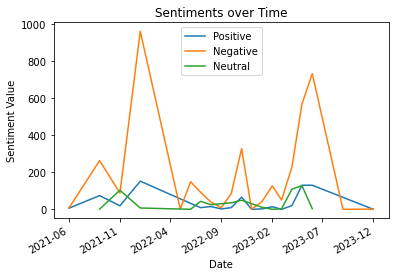

In [136]:
import matplotlib.dates as mdates

pol_df = df_kmens[df_kmens['merged_labels'] == "politic"]


pol_df['Date'] = pd.to_datetime(pol_df['Date'])
pol_df = pol_df[-np.isnan(pol_df['Date'])]  
pol_df['Date'] = pol_df['Date'].dt.to_period('M').dt.to_timestamp()

pos_df = pol_df[pol_df['Label'] == 1]
neg_df = pol_df[pol_df['Label'] == -1]
neut_df = pol_df[pol_df['Label'] == 0]


pos_df = pos_df.groupby('Date').count()['Comment']
neg_df = neg_df.groupby('Date').count()['Comment']
neut_df = neut_df.groupby('Date').count()['Comment']

#pol_df_date_grouped = pol_df.groupby('Date').count()['Comment']
#soc_df_date_grouped = soc_df.groupby('Date').count()['Comment']
#reg_df_date_grouped = reg_df.groupby('Date').count()['Comment']


fig, ax = plt.subplots()

# Plot the merged clusters
ax.plot(pos_df.index, pos_df.values, label='Positive')
ax.plot(neg_df.index, neg_df.values, label='Negative')
ax.plot(neut_df.index, neut_df.values, label='Neutral')


# Set the locator
locator = mdates.MonthLocator(interval=5)  # every 5 months
ax.xaxis.set_major_locator(locator)

# Set the formatter
formatter = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(formatter)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.title('Sentiments over Time')

plt.savefig('pol_clusters.png', dpi=300)
plt.show()


/tmp/ipykernel_1206815/3934272428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pol_df['Date'] = pd.to_datetime(pol_df['Date'])


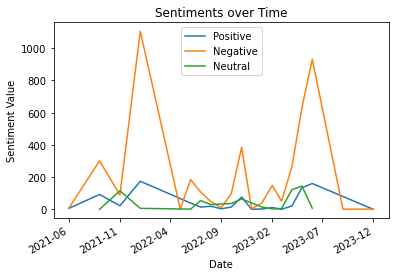

In [450]:
import matplotlib.dates as mdates

pol_df = df_kmens[df_kmens['merged_labels'] == "social"]


pol_df['Date'] = pd.to_datetime(pol_df['Date'])
pol_df = pol_df[-np.isnan(pol_df['Date'])]  
pol_df['Date'] = pol_df['Date'].dt.to_period('M').dt.to_timestamp()

pos_df = pol_df[pol_df['Label'] == 1]
neg_df = pol_df[pol_df['Label'] == -1]
neut_df = pol_df[pol_df['Label'] == 0]


pos_df = pos_df.groupby('Date').count()['Comment']
neg_df = neg_df.groupby('Date').count()['Comment']
neut_df = neut_df.groupby('Date').count()['Comment']

#pol_df_date_grouped = pol_df.groupby('Date').count()['Comment']
#soc_df_date_grouped = soc_df.groupby('Date').count()['Comment']
#reg_df_date_grouped = reg_df.groupby('Date').count()['Comment']


fig, ax = plt.subplots()

# Plot the merged clusters
ax.plot(pos_df.index, pos_df.values, label='Positive')
ax.plot(neg_df.index, neg_df.values, label='Negative')
ax.plot(neut_df.index, neut_df.values, label='Neutral')


# Set the locator
locator = mdates.MonthLocator(interval=5)  # every 5 months
ax.xaxis.set_major_locator(locator)

# Set the formatter
formatter = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(formatter)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.title('Sentiments over Time')

plt.savefig('social_clusters.png', dpi=300)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\1229908604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pol_df['Date'] = pd.to_datetime(pol_df['Date'])


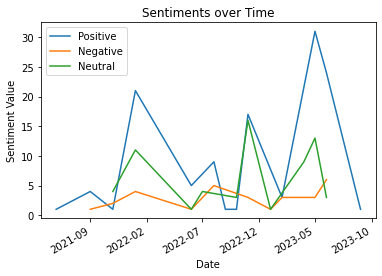

In [137]:
import matplotlib.dates as mdates

pol_df = df_kmens[df_kmens['merged_labels'] == "religious"]


pol_df['Date'] = pd.to_datetime(pol_df['Date'])
pol_df = pol_df[-np.isnan(pol_df['Date'])]  
pol_df['Date'] = pol_df['Date'].dt.to_period('M').dt.to_timestamp()

pos_df = pol_df[pol_df['Label'] == 1]
neg_df = pol_df[pol_df['Label'] == -1]
neut_df = pol_df[pol_df['Label'] == 0]


pos_df = pos_df.groupby('Date').count()['Comment']
neg_df = neg_df.groupby('Date').count()['Comment']
neut_df = neut_df.groupby('Date').count()['Comment']

#pol_df_date_grouped = pol_df.groupby('Date').count()['Comment']
#soc_df_date_grouped = soc_df.groupby('Date').count()['Comment']
#reg_df_date_grouped = reg_df.groupby('Date').count()['Comment']


fig, ax = plt.subplots()

# Plot the merged clusters
ax.plot(pos_df.index, pos_df.values, label='Positive')
ax.plot(neg_df.index, neg_df.values, label='Negative')
ax.plot(neut_df.index, neut_df.values, label='Neutral')


# Set the locator
locator = mdates.MonthLocator(interval=5)  # every 5 months
ax.xaxis.set_major_locator(locator)

# Set the formatter
formatter = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(formatter)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.title('Sentiments over Time')

plt.savefig('religious_clusters.png', dpi=300)
plt.show()


In [304]:
from bokeh.io import export_png
from bokeh.models import Label,Arrow
from bokeh.models import NormalHead, OpenHead, VeeHead
import numpy as np

In [305]:
!pip install pyLDAvis



In [306]:
import pandas as pd
import numpy as np
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from urllib.parse import urlsplit
import itertools
import ast

pd.set_option('display.max_colwidth', -1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF,LatentDirichletAllocation
import pyLDAvis #Nous utilisons pyLDAvis pour créer des visualisations interactives de modèles de sujet.
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim import corpora
from gensim.utils import simple_preprocess, lemmatize
import gensim
from nltk.corpus import stopwords
import nltk
import re
import logging
import string
import arabic_reshaper
import arabicstopwords.arabicstopwords as stp
from farasa.stemmer import FarasaStemmer

C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\2650237779.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [ ]:
def get_sub_dict(dict_, size=10):
    sub_dict = {}
    i = 0
    for key, values in dict_.items():
        i += 1
        sub_dict[key] = values
        
        if (i> size):
            break;
    return(sub_dict)

In [ ]:
def get_tokens_tfd(text_list, nb_tokens = 10):
    total_tokens = []
    for text in stemmed_text_list:
        total_tokens += nltk.word_tokenize(text)
    #compute frequency distribution for all the bigrams in the text
    #Create your bigrams
    bgs = nltk.bigrams(total_tokens)
    fdist = nltk.FreqDist(bgs)

    fdist_sorted = dict(sorted(fdist.items(), key=lambda item: item[1], reverse = True))

    sub_dict = get_sub_dict(fdist_sorted, nb_tokens)
    keys_list = [list(tuple_) for tuple_ in list(sub_dict.keys())]
    top_20_tokens = [x for sublist in keys_list for x in sublist]
    top_20_tokens = list(set(top_20_tokens))
    top_20_tokens_dict = {i: top_20_tokens[i] for i in range(len(top_20_tokens))}
    tokens_tfd = np.zeros((len(top_20_tokens),len(stemmed_text_list)))
    i = 0
    for token in top_20_tokens:
        for j in range(len(stemmed_text_list)):
            if (token in list(stemmed_text_list)[j]) == True:
                tokens_tfd[i][j] = 1
        i +=1
    tokens_tfd = np.dot(tokens_tfd, tokens_tfd.T)
    return(tokens_tfd,top_20_tokens)

In [ ]:
!pip install python-bidi




In [307]:
import arabic_reshaper
import arabicstopwords.arabicstopwords as stp
from bidi.algorithm import get_display

import os

if not os.path.exists('./plots'):
    os.makedirs('./plots')

  

def plot_graph(topic,text, top_20_tokens = None, tokens_tfd = None):
    
    G = nx.Graph()
    for i in range(len(top_20_tokens)):
        reshaped_text_i = arabic_reshaper.reshape(top_20_tokens[i])
        artext_i = get_display(reshaped_text_i)
        for j in range(len(top_20_tokens)):
            if(i != j):
                reshaped_text_j = arabic_reshaper.reshape(top_20_tokens[j])
                artext_j = get_display(reshaped_text_j)
                G.add_edge(artext_i, artext_j, weight = int(tokens_tfd[i][j]))


    #return(0)
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    labels_dict = {(u,v):d['weight'] for (u, v, d) in G.edges(data=True) if d["weight"] > 0}
    #esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

    pos = nx.circular_layout(G)  # positions for all nodes - seed for reproducibility

    # nodes
    fig = plt.figure(frameon=False)
    fig.set_size_inches(20,10)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color = "#A0CBE2")
    
    total_weights = np.sum(tokens_tfd)
    widths = [(d['weight']/total_weights)*200 for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=widths, edge_color = "#74898C")

    # labels
   
    nx.draw_networkx_labels(G, pos, font_size=40, font_family='NotoNaskhArabic-Regular', font_color="black")

    #nx.draw_networkx_edge_labels(G, pos, font_size=15, edge_labels=labels_dict, font_color = 'blue');
    #ax = plt.gca();
    ax.margins(0.08);

    #plt.axis("off");
    #plt.tight_layout();
    
    plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")

    #plt.show()

In [308]:
topics = set(df_kmens["merged_labels"])

print(df_kmens.columns)


In [309]:
df_kmens

,level_0,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment,normalized_comment,diacritics_comment,no_stopwords2,comment_tokenized2,merged_labels,ready_comment2
0,0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأصل نهار أومطال طفي ضو نقص لماء باش لفاتورة متكونش غالية أو بلا كثرة لهضرة راه كاينة فئة كتستهلك الماء والكهرباء أضعاف مضاعفة😢😢😢,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأصل نهار أومطال طفي ضو نقص لماء باش لفاتورة متكونش غالية أو بلا كثرة لهضرة راه كاينة فئة كتستهلك الماء والكهرباء أضعاف مضاعفة😢😢😢,زعما هاد الناس واش عينهم في الشعب لي هو في الأصل نهار أومطال طفي ضو نقص لماء باش لفاتورة متكونش غالية أو بلا كثرة لهضرة راه كاينة فئة كتستهلك الماء والكهرباء أضعاف مضاعفة😢😢😢,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, هو, في, الاصل, نهار, اومطال, طفي, ضو, نقص, لماء, باش, لفاتوره, متكونش, غاليه, او, بلا, كثره, لهضره, راه, كاينه, فءه, كتستهلك, الماء, والكهرباء, اضعاف, مضاعفه]","[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, اومطال, طفي, ضو, نقص, لماء, باش, لفاتوره, متكونش, غاليه, او, كثره, لهضره, راه, كاينه, فءه, كتستهلك, الماء, والكهرباء, اضعاف, مضاعفه]",زعما الناس الشعب الاصل نهار اومطال طفي ضو نقص لماء لفاتوره متكونش غاليه كثره لهضره كاينه فءه كتستهلك الماء والكهرباء اضعاف مضاعفه,زعما هاد الناس واش عينهم في الشعب لي هو في الاصل نهار اومطال طفي ضو نقص لماء باش لفاتوره متكونش غاليه او بلا كثره لهضره راه كاينه فءه كتستهلك الماء والكهرباء اضعاف مضاعفه😢😢😢,زعما هاد الناس واش عينهم في الشعب لي هو في الاصل نهار اومطال طفي ضو نقص لماء باش لفاتوره متكونش غاليه او بلا كثره لهضره راه كاينه فءه كتستهلك الماء والكهرباء اضعاف مضاعفه😢😢😢,"[زعما, هاد, الناس, واش, الشعب, الاصل, نهار, اومطال, طفي, ضو, نقص, لماء, باش, لفاتوره, متكونش, غاليه, او, كثره, لهضره, راه, كاينه, فءه, كتستهلك, الماء, والكهرباء, اضعاف, مضاعفه]","[زعما, الناس, الشعب, الاصل, نهار, اومطال, طفي, ضو, نقص, لماء, لفاتوره, متكونش, غاليه, كثره, لهضره, كاينه, فءه, كتستهلك, الماء, والكهرباء, اضعاف, مضاعفه]",politic,زعما الناس الشعب الاصل نهار اومطال طفي ضو نقص لماء لفاتوره متكونش غاليه كثره لهضره كاينه فءه كتستهلك الماء والكهرباء اضعاف مضاعفه
1,1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق عندنا مشكل فالوعي للأسف,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق عندنا مشكل فالوعي للأسف,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق عندنا مشكل فالوعي للأسف,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, من, الماء, بق, عندنا, مشكل, فالوعي, للاسف]","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء, بق, مشكل, فالوعي, للاسف]",بنادم كيبغي يتوضي كيتوضي بجوج لتر الماء بق مشكل فالوعي للاسف,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق عندنا مشكل فالوعي للاسف,بنادم كيبغي يتوضي كيتوضي بجوج لتر من الماء بق عندنا مشكل فالوعي للاسف,"[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء, بق, مشكل, فالوعي, للاسف]","[بنادم, كيبغي, يتوضي, كيتوضي, بجوج, لتر, الماء, بق, مشكل, فالوعي, للاسف]",social,بنادم كيبغي يتوضي كيتوضي بجوج لتر الماء بق مشكل فالوعي للاسف
2,2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف الامتار المکعبه فی سقی الموز والافوکادو,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف الامتار المکعبه فی سقی الموز والافوکادو,الترشید یکون للفلاحین الذین یستغلون الالاف الامتار المکعبه فی سقی الموز والافوکادو,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الالاف, الامتار, المکعبه, فی, سقی, الموز, والافوکادو]","[الترشید, یکون, للفلاحین, الذین, یستغلون, الالاف, الامتار, المکعبه, فی, سقی, الموز, والافوکادو]",الترشید یکون للفلاحین الذین یستغلون الالاف الامتار المکعبه فی سقی الموز والافوکادو,الترشید یکون للفلاحین الذین یستغلون الالاف الامتار المکعبه فی سقی الموز والافوکادو,الترشید یکون للفلاحین الذین یستغلون الالاف الامتار المکعبه فی سقی الموز والافوکادو,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الالاف, الامتار, المکعبه, فی, سقی, الموز, والافوکادو]","[الترشید, یکون, للفلاحین, الذین, یستغلون, الالاف, الامتار, المکعبه, فی, سقی, الموز, والافوکادو]",politic,الترشید یکون للفلاحین الذین یستغلون الالاف الامتار المکعبه فی سقی الموز والافوکادو
3,3,3,خويو لابيسيناتكم ونقصو

In [310]:
topics

{'politic', 'religious', 'social'}

In [311]:
stop_words_extended = [ 'للشرب' ,'الصالح','راك','وزوامل','الزامل','ههه','شيء','اش','تعالي','قال','فين','هههههه','العلي', 'العظيم', 'سيدكم' ,'العلي', 'بحال' ,'تحليه','الماءيه','زريبه' ,'بوسبير','اللي', 'شكون','المغرب','تحياتي','مياه','انه','يجب','هادشي','الصحراء' ,'يوجد' ,'غزيرة', 'الوكيل','الغربية' ,'الجنسيه' ,'السياحه','الجوفيه','يمكن', 'نتوما', 'اول' ,'الانسان' ,'انسانا' ,'العاقل','غزيره' ,'تبارك','الله', 'يرحمنا','الجليد' ,'الحارق','المغربيه','يلطف' ,'بينا' ,'ياخد' ,'الحق' ,'يقول','الحل', 'يوم']

In [312]:
# removing stopwords
def remove_stopwords(corpus,mostCommonsWord=[]):
    filtered_corpus=[]
    for tokens in corpus:
        #others_sw=["المغرب","شكرا","الصحافه","مغاربه","الي","اخر","علي","اليوم","ساعه","الساعه","والتفاصيل","خلال","تسجيل","والتفاصيل","لمزيد","الارقام","العد","حتي","بسب","الا","باش","بفيروس"
                  #,"المغربيه","المغاربه","بفيروس","بالمغرب","حالات","تعلن","الهم","الوباءيه","يسجل","الاصابات","بكورونا","الحاله","جديده","الاجمالي","الاجمالي","حصيله","اول","قبل","يوم","زمن","مءكده",
                   #"الدار","البيضاء","بلادك","واحد","المغربي","الحالات","حول","وفيات","وباء","حول","انا","مساء","هاد","الجديده","الفيروس","ديال","كان","الصحي","الجديد","الملكه","عاجل","فدارك"
                   #,"الصحيه","تحمي","اله","الصحه","خليك","امام","بقا","محمد","كورونا","هادي"]
        
        #french_sw = stopwords.words('french') 
        arabic_sw=list(set(stopwords.words("arabic"))) 
        #arabic_sw.extend(others_sw)
        arabic_sw.extend(list(stp.stopwords_list()))
        arabic_sw.extend(mostCommonsWord)
        
        filtered_tokens = [token for token in tokens.split() if token not in arabic_sw and len(token)>3]
        filtred_text=' '.join(filtered_tokens) #reforme le text du documents separé par espace
        filtered_corpus.append(filtred_text)
    return filtered_corpus

In [313]:
df_kmens['ready_comment2'] = df_kmens['comment_tokenized2'].apply(lambda x: ' '.join(x))

topic: social


C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\423148836.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontfamily" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")


topic: politic


C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\423148836.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontfamily" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")


topic: religious


C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\423148836.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontfamily" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")


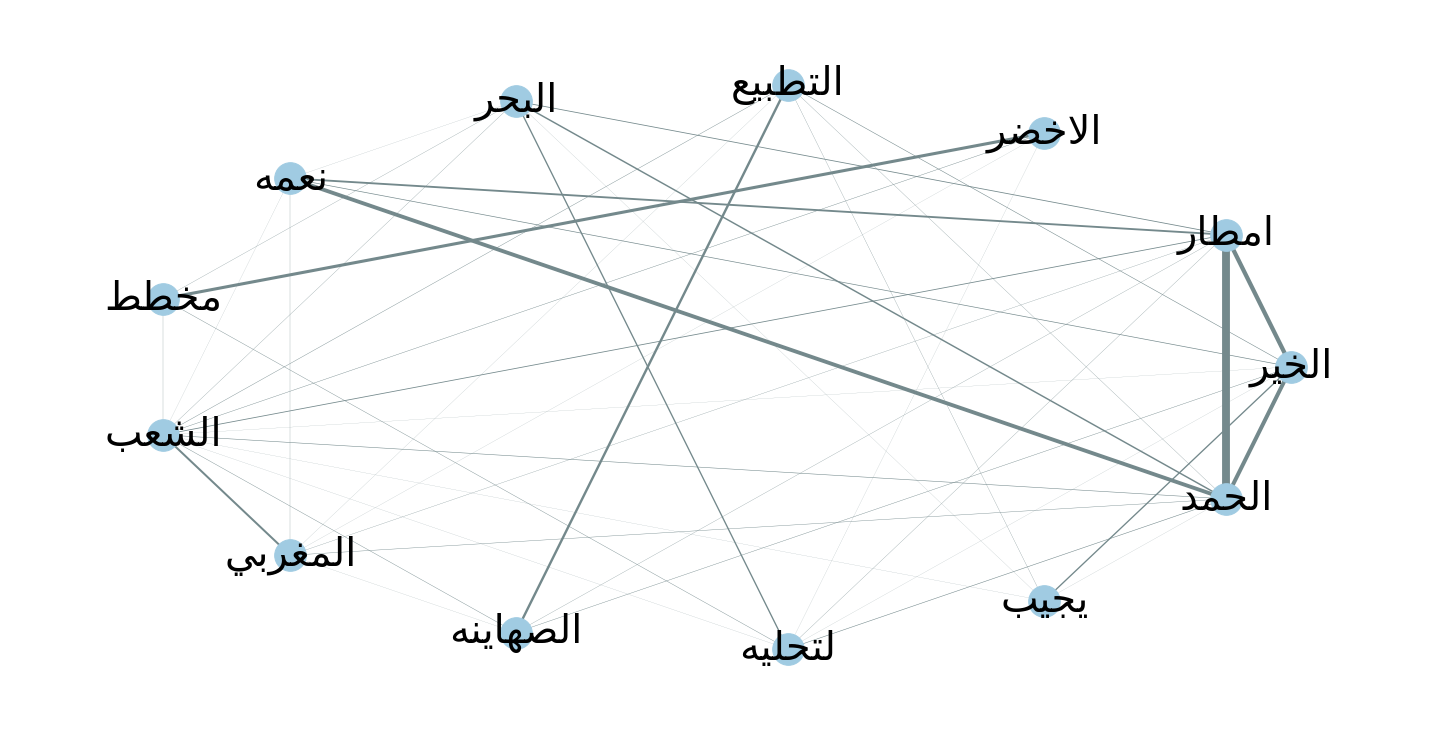

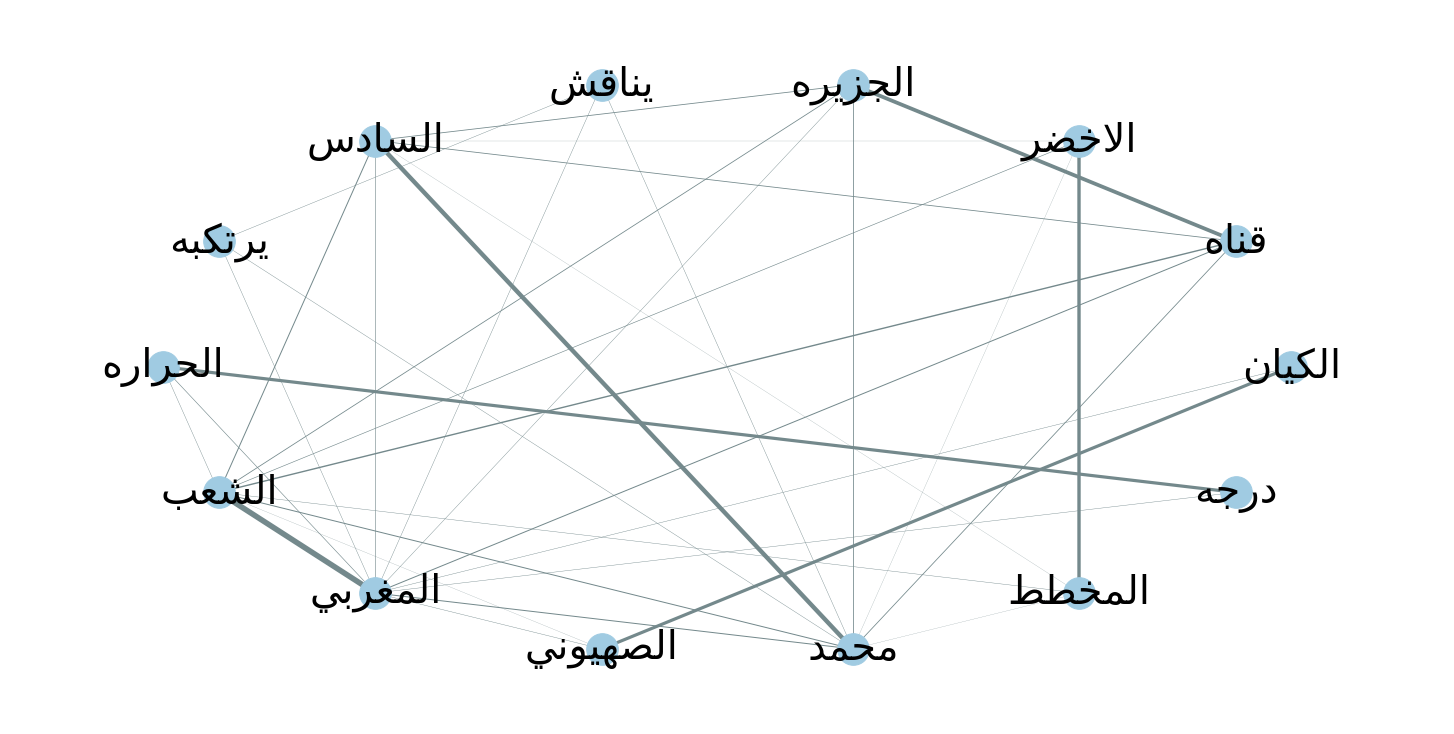

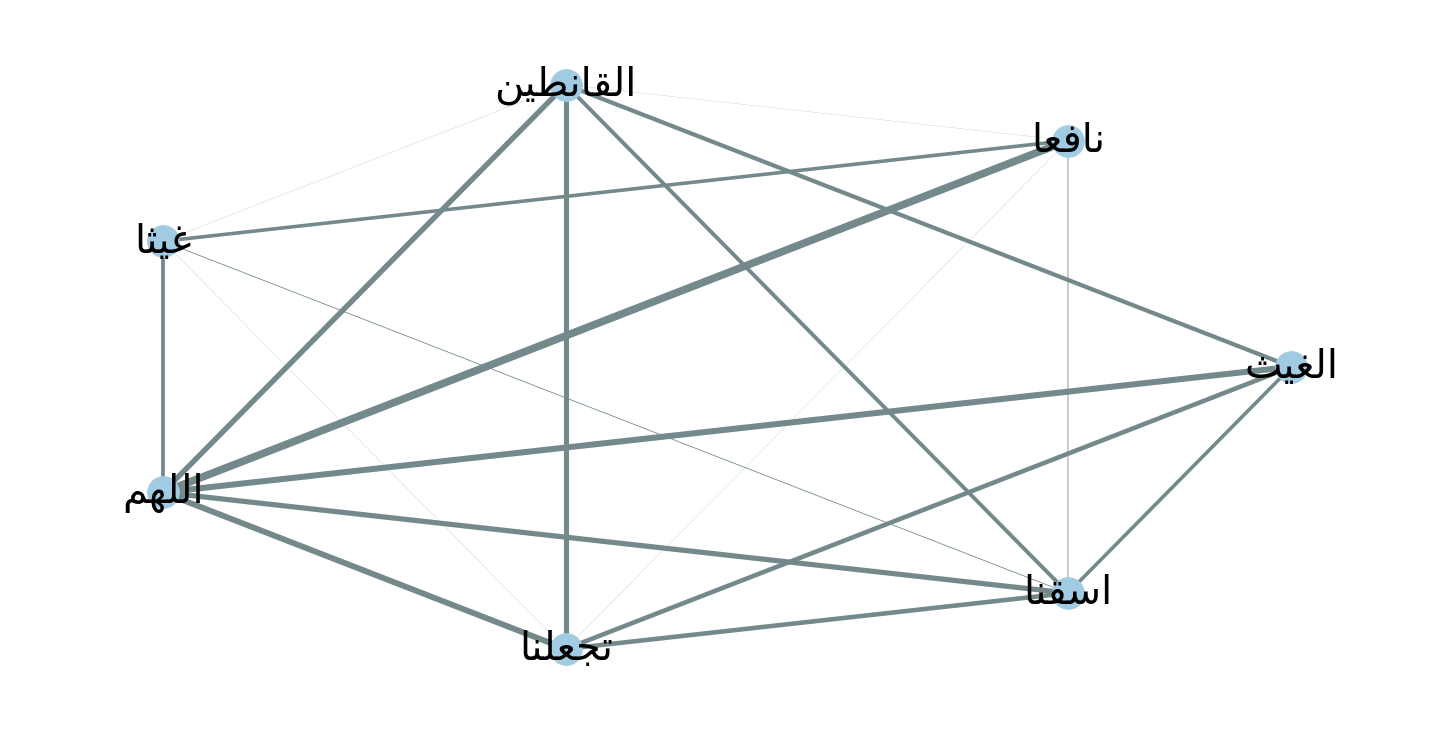

In [314]:
for topic in topics:
    print("topic:", topic)
    stemmed_text_list = df_kmens[df_kmens["merged_labels"] == topic]["ready_comment2"]
    stemmed_text_list = remove_stopwords(stemmed_text_list, stop_words_extended)
    tokens_tfd, top_20_tokens = get_tokens_tfd(stemmed_text_list, 6)
    plot_graph(topic, stemmed_text_list, top_20_tokens, tokens_tfd)
    plt.savefig('topics.png', dpi=300)

In [315]:

for topic in topics:
    print("topic:", topic)
    stemmed_text_list = df_kmens[df_kmens["merged_labels"] == topic]["ready_comment2"]
    stemmed_text_list = remove_stopwords(stemmed_text_list, stop_words_extended)
    tokens_tfd, top_20_tokens = get_tokens_tfd(stemmed_text_list, 6)
    plot_graph(topic, stemmed_text_list, top_20_tokens, tokens_tfd)
    plt.savefig(f'{topic}.png', dpi=300)
    plt.close()


topic: social


C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\423148836.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontfamily" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")


topic: politic


C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\423148836.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontfamily" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")


topic: religious


C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\423148836.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontfamily" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")


In [316]:
tokens_total = []
for topic in topics:
    print("topic:",topic)
    #if (topic == "Social Life"):
    stemmed_text_list = df_kmens[df_kmens["merged_labels"] == topic]["ready_comment2"]
    stemmed_text_list=remove_stopwords(stemmed_text_list, stop_words_extended)
    tokens_tfd,top_20_tokens = get_tokens_tfd(stemmed_text_list,7)
    tokens_total.append(top_20_tokens)
    #plot_graph(topic,stemmed_text_list, top_20_tokens, tokens_tfd)

topic: social
topic: politic
topic: religious


In [293]:
tokens_total


[['الخير',
  'امطار',
  'الاخضر',
  'التطبيع',
  'البحر',
  'نعمه',
  'مخطط',
  'الشعب',
  'المغربي',
  'الصهاينه',
  'لتحليه',
  'جزاء',
  'يجيب',
  'الحمد'],
 ['الكيان',
  'قناه',
  'الاخضر',
  'الجزيره',
  'يناقش',
  'السادس',
  'مدرارا',
  'يرتكبه',
  'الحراره',
  'الشعب',
  'المغربي',
  'الصهيوني',
  'محمد',
  'المخطط',
  'درجه',
  'السماء'],
 ['الغيث', 'ارحمنا', 'نافعا', 'القانطين', 'غيثا', 'اللهم', 'تجعلنا', 'اسقنا']]

In [317]:
flatened_tokens = [x for sublist in tokens_total for x in sublist]

In [318]:
set(flatened_tokens)

{'ارحمنا',
 'اسقنا',
 'الاخضر',
 'البحر',
 'التطبيع',
 'الجزيره',
 'الحراره',
 'الحمد',
 'الخير',
 'السادس',
 'السماء',
 'الشعب',
 'الصهاينه',
 'الصهيوني',
 'الغيث',
 'القانطين',
 'الكيان',
 'اللهم',
 'المخطط',
 'المغربي',
 'امطار',
 'تجعلنا',
 'جزاء',
 'درجه',
 'غيثا',
 'قناه',
 'لتحليه',
 'محمد',
 'مخطط',
 'مدرارا',
 'نافعا',
 'نعمه',
 'يجيب',
 'يرتكبه',
 'يناقش'}

C:\Users\DELL\AppData\Local\Temp\ipykernel_17484\423148836.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontfamily" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./plots/{topic}_wordcloud_network.svg', transparent=True, pad_inches=0, fontfamily="Arial Unicode MS")


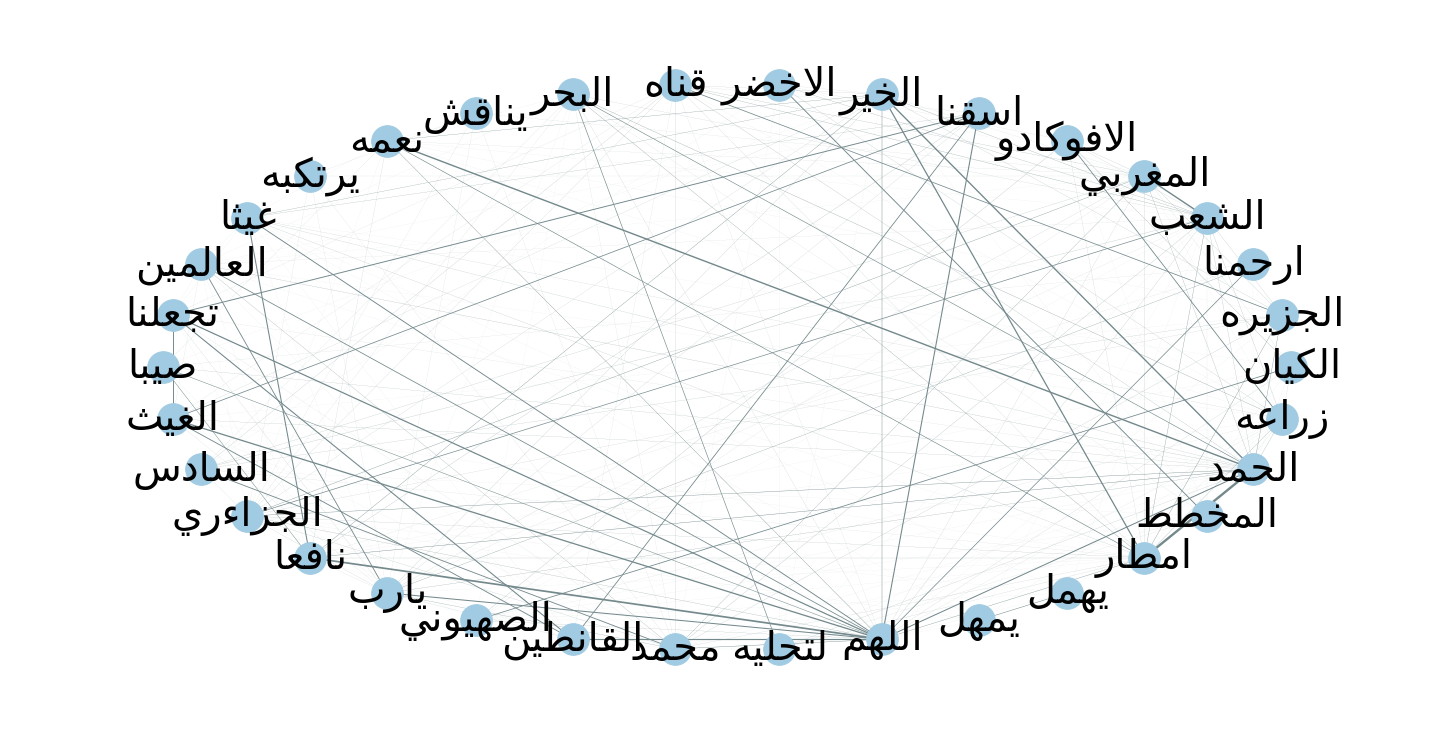

In [322]:


stemmed_text_list = df_kmens["ready_comment2"]
stemmed_text_list = remove_stopwords(stemmed_text_list, stop_words_extended)
tokens_tfd, top_20_tokens = get_tokens_tfd(stemmed_text_list, 20)
plot_graph("social", " ".join(stemmed_text_list), top_20_tokens, tokens_tfd)
plt.savefig('wordcloud.png',dpi=300)

In [147]:
labels


array([0, 2, 0, ..., 0, 0, 0])

df_kmens['Cluster'] = labels


In [214]:
df_kmens


,level_0,index,Comment,Date,Unnamed: 0,Username,Label,Catègorie,clean_comment,comment_num,comment_tokenized,no_stopwords,ready_comment,Cluster,no_stopwords2
0,0,0,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,2022-07-01,NaN,NaN,-1.0,NaN,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,زعما هاد الناس واش عينهم في الشعب لي هو في الأ...,"[زعما, هاد, الناس, واش, عينهم, في, الشعب, لي, ...","[زعما, هاد, الناس, واش, الشعب, الأصل, نهار, أو...",زعما هاد الناس واش الشعب الأصل نهار أومطال طفي...,6,"[زعما, هاد, الناس, واش, الشعب, الأصل, نهار, أو..."
1,1,1,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,2022-07-01,NaN,NaN,-1.0,NaN,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,بنادم كيبغي يتوضى كيتوضى بجوج لتر من الماء بق ...,"[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, من, ا...","[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, الماء...",بنادم كيبغي يتوضى كيتوضى بجوج لتر الماء بق مشك...,7,"[بنادم, كيبغي, يتوضى, كيتوضى, بجوج, لتر, الماء..."
2,2,2,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,2022-07-01,NaN,NaN,-1.0,NaN,الترشید یکون للفلاحین الذین یستغلون 100الالاف ...,الترشید یکون للفلاحین الذین یستغلون الالاف الا...,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...","[الترشید, یکون, للفلاحین, الذین, یستغلون, الال...",الترشید یکون للفلاحین الذین یستغلون الالاف الا...,7,"[الترشید, یکون, للفلاحین, الذین, یستغلون, الال..."
3,3,3,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,2022-07-01,NaN,NaN,-1.0,NaN,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,خويو لابيسيناتكم ونقصو من المشيان لسبا ونقصو م...,"[خويو, لابيسيناتكم, ونقصو, من, المشيان, لسبا, ...","[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص...",خويو لابيسيناتكم ونقصو المشيان لسبا ونقصو بنوا...,3,"[خويو, لابيسيناتكم, ونقصو, المشيان, لسبا, ونقص..."
4,4,4,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,2022-07-01,NaN,NaN,-1.0,NaN,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,وديك الفيلات والفيرمات الي كاين فيهم الي كيدي ...,"[وديك, الفيلات, والفيرمات, الي, كاين, فيهم, ال...","[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد...",وديك الفيلات والفيرمات الي كاين الي كيدي الما ...,7,"[وديك, الفيلات, والفيرمات, الي, كاين, الي, كيد..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,6734,1625,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,2022-10-01,1625.0,lailatebaa9,-1.0,meteorological,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,شتا صبات اشفرا مسخيط الولدين دخلين في حكم الله...,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, في, ...","[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,...",شتا صبات اشفرا مسخيط الولدين دخلين حكم الله تت...,5,"[شتا, صبات, اشفرا, مسخيط, الولدين, دخلين, حكم,..."
6735,6735,1626,لهاذا أوقفو زراعة الأفوكادو,2022-10-01,1626.0,hassnamandour78,0.0,innovator,لهاذا أوقفو زراعة الأفوكادو,لهاذا أوقفو زراعة الأفوكادو,"[لهاذا, أوقفو, زراعة, الأفوكادو]","[لهاذا, أوقفو, زراعة, الأفوكادو]",لهاذا أوقفو زراعة الأفوكادو,7,"[لهاذا, أوقفو, زراعة, الأفوكادو]"
6736,6736,1627,الحل هو منع زرع الافوكا,2022-10-01,1627.0,azizabernaoui,0.0,innovator,الحل هو منع زرع الافوكا,الحل هو منع زرع الافوكا,"[الحل, هو, منع, زرع, الافوكا]","[الحل, منع, زرع, الافوكا]",الحل منع زرع الافوكا,7,"[الحل, منع, زرع, الافوكا]"
6737,6737,1628,عوض! ما يدرو السرعة فالخوا الخاوي يديرو السرعة...,2022-10-01,1628.0,h19_ch,0.0,innovator,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,عوض ما يدرو السرعة فالخوا الخاوي يديرو السرعة ...,"[عوض, ما, يدرو, السرعة, فالخوا, الخاوي, يديرو,...","[يدرو, السرعة, فالخوا, الخاوي, يديرو, السرعة, ...",يدرو السرعة فالخوا الخاوي يديرو السرعة البنيات...,6,"[يدرو, السرعة, فالخوا, الخاوي, يديرو, السرعة, ..."


In [215]:
for i in range(kmeans.n_clusters):
    print(f"Cluster {i}:")
    print(df_kmens[df_kmens['Cluster'] == i]['Comment'].head())  # print the first few comments in each cluster


Cluster 0:
76     هههه اودي ولينا كنحشمو فبلاصتكم واش اصحافة الع...
133    ما دامت الزكاة لا تعطى و الفساد متفشي في البلا...
164    اللهم ارحمنا فوق الأرض و تحت الارض و يوم العرض...
219    Wala nansa m3adal alfasad alladi tkhata koul a...
223                        لا حولا ولا قوة الا بالله 😢 💔
Name: Comment, dtype: object
Cluster 1:
73            كذوب الحمد لله العام زين والشتا خيط من سما
90     الحمد الله المغرب فيه الماء شوفو عا أمطار الثل...
108    و هاد الشتا فين تتمشي....الحمد لله عندنا السدو...
109    عاودت رجعت شتا في هاد دقيقة ما شاء الله الحمد ...
226    الحمد لله على كل حال حنا ماغاديش نتشرطو على ال...
Name: Comment, dtype: object
Cluster 2:
156     التطبيع مع الكيان الصهيوني من يستبيح المسجد ال...
195                                         التطبيع 🤦🏻‍♂️
957      "نتيجة التطبيع مع الكيان المحتل وخيانة الجزائ...
962      "بسبب التطبيع  مع الص ه ينه  و المعتوه  الذى ...
1046                                     "نتائج التطبيع",
Name: Comment, dtype: object
Cluster 3:
3     خوي

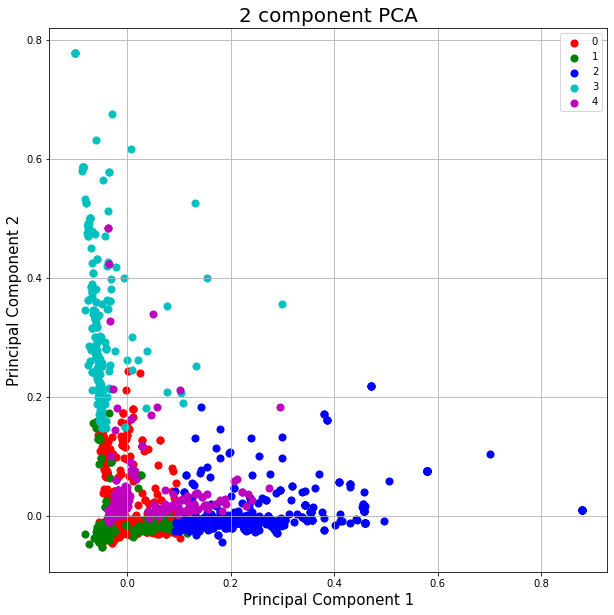

In [216]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_tfidf.toarray())

# Create a new dataframe with two components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Concatenate cluster labels to pca_df
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster': labels})], axis=1)

# Visualize 2D Projection
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Color code the clusters
colors = ['r', 'g', 'b', 'c', 'm']
cluster_labels = list(set(labels))  # Get unique cluster labels
for target, color in zip(cluster_labels, colors):
    indicesToKeep = pca_df['Cluster'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'],
               pca_df.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50)

ax.legend(cluster_labels)
ax.grid()
plt.savefig('topics.png', dpi=300)



In [218]:
# Create a list of unique topics
topics = df_kmens['Cluster'].unique()

# Create a color map for the topics
color_map = plt.cm.get_cmap('tab10')

# Plot the data points by topics
for i, topic in enumerate(topics):
    data = df_kmens[df_kmens['Cluster'] == topic]
   plt.scatter(data['PC1'], data['PC2'], color=color_map(i), label=topic)
 label=topic)

# Set the labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points by Topics')

# Add a legend
plt.legend()

# Save the plot as a PNG image
plt.savefig('plot_by_topics.png', dpi=300)

# Show the plot
plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [ ]:
df_plot = df4.groupby(['Date','Label']).count()['Comment']

In [ ]:
df_plot = df_plot.reset_index()
df_plot.set_index('Date', inplace=True)

In [ ]:
df_plot

In [ ]:
plt.plot(df_plot.index, df_plot['Comment'])

<AxesSubplot:xlabel='Date,Label'>

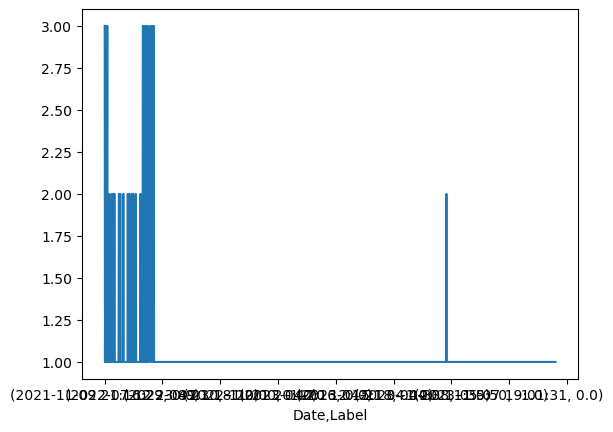

In [77]:
df4.groupby(['Date','Label']).count()['Comment'].plot()

In [ ]:
from sklearn.model_selection import  GridSearchCV

# Define a grid of hyperparameters to search over for each model
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

nb_param_grid = {
    'alpha': [0.1, 1, 10]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7]
}

dt_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the models
lr = LogisticRegression(max_iter=1000, random_state=42)
nb = MultinomialNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Initialize GridSearchCV objects for each model and fit them to the training data
lr_grid_search = GridSearchCV(lr, param_grid=lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

nb_grid_search = GridSearchCV(nb, param_grid=nb_param_grid, cv=5)
nb_grid_search.fit(X_train, y_train)

knn_grid_search = GridSearchCV(knn, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

dt_grid_search = GridSearchCV(dt, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(rf, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

svm_grid_search = GridSearchCV(svm, param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy for each model
print("Logistic Regression - Best hyperparameters: ", lr_grid_search.best_params_ ,"- Best accuracy: ", lr_grid_search.best_score_)
print("Multinominal Naives Bayes - Best hyperparameters: ", nb_grid_search.best_params_, "Best accuracy: ", nb_grid_search.best_score_)
print("K-Nearest Neighbors  - Best hyperparameters: ", knn_grid_search.best_params_, "Best accuracy: ", knn_grid_search.best_score_)
print("Decision Tree - Best hyperparameters: ", dt_grid_search.best_params_, "Best accuracy: ", dt_grid_search.best_score_)
print("Random Forest - Best hyperparameters: ", rf_grid_search.best_params_, "Best accuracy: ", rf_grid_search.best_score_)
print("Support Vector Machine - Best hyperparameters: ", svm_grid_search.best_params_, "Best accuracy: ", svm_grid_search.best_score_)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [ ]:
# Initialize an MultinominalNB model with the best hyperparameters we got
nb = MultinomialNB(alpha=0.1)

# Train the MultinominalNB model on the training set
nb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = nb.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Validation accuracy:', acc)

In [ ]:
# Initialize an LR model with the best hyperparameters we got
lr = LogisticRegression(C=10, penalty='l2')

# Train the LR model on the training set
lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lr.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Validation accuracy:', acc)

In [ ]:
# Initialize an SVM model with the best hyperparameters we got
svm = SVC(C=10, kernel='linear')

# Train the SVM model on the training set
svm.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svm.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Validation accuracy:', acc)

In [ ]:
#Cross Validation
scores = cross_val_score(svm, X_train, y_train, cv=10)
print(scores.mean())

In [ ]:
#Cross Validation
scores = cross_val_score(lr, X_train, y_train, cv=10)
print(scores.mean())

In [ ]:
#Cross Validation
scores = cross_val_score(nb, X_train, y_train, cv=10)
print(scores.mean())

In [ ]:
#test_prediction = lr.predict(X_test)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# create 10 SVM models with different hyperparameters
svm_models = []
for i in range(10):
    svm_models.append(SVC(kernel='linear', C=10/(i+10)))

# create an ensemble of the 10 SVM models using voting
svm_ensemble = VotingClassifier(estimators=[('svm'+str(i), svm_models[i]) for i in range(10)], voting='hard')

# perform 10-fold cross-validation on the ensemble
scores = cross_val_score(svm_ensemble, X_train, y_train, cv=10)

# print the cross-validation score
print('Accuracy: %0.2f ' % (np.mean(scores)))

In [ ]:
svm_ensemble.fit(X_train, y_train)
test_prediction = svm_ensemble.predict(X_test)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Initialize 10 MultinomialNB models with different hyperparameters
models = []
for alpha in np.arange(0.1, 1.1, 0.1):
    model = MultinomialNB(alpha=alpha)
    models.append(('m' + str(alpha), model))

# Create the ensemble using the VotingClassifier
nb_ensemble = VotingClassifier(estimators=models)

# Evaluate the ensemble using cross-validation
scores = cross_val_score(nb_ensemble, X_train, y_train, cv=10)

# Print the average accuracy and standard deviation of the scores
print('Accuracy: %0.2f ' % (np.mean(scores)))


In [ ]:
from sklearn.ensemble import StackingClassifier

# Initialize the ensemble model using the StackingClassifier
estimators = [('nb', nb), ('svm', svm)]
ensemble = StackingClassifier(estimators=estimators, final_estimator=SVC())

# evaluate the ensemble using 10-fold cross-validation
scores = cross_val_score(ensemble, X_train, y_train, cv=10)

# print the average accuracy and standard deviation of the scores
print('Accuracy: %0.2f ' % (scores.mean()))

In [ ]:
from sklearn.ensemble import StackingClassifier

# Initialize the ensemble model using the StackingClassifier
estimators = [('nb', nb), ('svm', svm), ('lr', lr)]
ensemble2 = StackingClassifier(estimators=estimators)

# evaluate the ensemble using 10-fold cross-validation
scores = cross_val_score(ensemble2, X_train, y_train, cv=10)

# print the average accuracy and standard deviation of the scores
print('Accuracy: %0.2f ' % (scores.mean()))

In [ ]:
#Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['label'], test_size=0.3, random_state=42)

In [ ]:
# create a pipeline for text classification
#pipeline = Pipeline([
#    ('vect', CountVectorizer()),
#    ('tfidf', TfidfTransformer()),
#    ('clf', MultinomialNB()),
#])

In [ ]:
MNB = MultinomialNB()

In [ ]:
MNB.fit(X_train, y_train)

In [ ]:
# train the Naive Bayes classifier
#pipeline.fit(X_train, y_train)

In [ ]:
# test the classifier on the testing set
y_pred = MNB.predict(X_test)

In [ ]:
# print the classification report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = le.fit_transform(X_train)

In [ ]:
# create a logistic regression model
lr = LogisticRegression()

In [ ]:
# train the model on the training set
lr.fit(X_train, y_train)

In [ ]:
# predict the target values for the test set
y_pred = lr.predict(X_test)

In [ ]:
# print the classification report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

In [ ]:
# fit the vectorizer to the text data and transform the text data into a sparse matrix of TF-IDF features
tfidf_matrix = tfidf.fit_transform(df['ready_comment'])

In [ ]:
# convert the sparse matrix to a dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())

In [ ]:
# concatenate the original dataframe with the TF-IDF dataframe
df = pd.concat([df, tfidf_df], axis=1)

In [ ]:
df

In [ ]:
tfidf_df

In [ ]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split(r'[\s,]+',text)
    return tokens
#applying function to the column
df['comment_tokenied']= df['clean_comment'].apply(lambda x: tokenization(x))

In [ ]:
df

In [ ]:
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel

In [ ]:
df['comment_tokenized']= df['clean_comment'].apply(lambda x: tokenize(x, conditions=is_arabicrange, morphs=strip_tashkeel))

In [ ]:
df

In [ ]:
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('arabic')

In [ ]:
nltk.download('stopwords')

In [ ]:
stopwords

In [ ]:

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['no_stopwords']= df['comment_tokenied'].apply(lambda x:remove_stopwords(x))

In [ ]:
df

In [ ]:
test = df['comment_tokenied'][0]

In [ ]:
len(test)

In [ ]:
df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
x = df['comment_tokenied'][0]

In [ ]:
c = ''
for i in range(len(df['comment_tokenied'])):
    x = df['comment_tokenied'].iloc[i]
    c=''
    for w in x:
        c += w+' '
    df['comment_tokenied_new'].iloc[i] = c 

In [ ]:
df

In [ ]:
df['comment_tonkenized'] = df['comment_tokenied'].apply(lambda x: ' '.join(word) for word in x)

In [ ]:
X = vectorizer.fit_transform(df['comment_tokenied_new'])

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel

In [ ]:
pip install pyarabic

In [ ]:
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel

In [ ]:
df['comment_tonkenized'][0] = tokenize(df['comment'][0], conditions=is_arabicrange, morphs=strip_tashkeel)

In [ ]:
type(df['comment'][0])